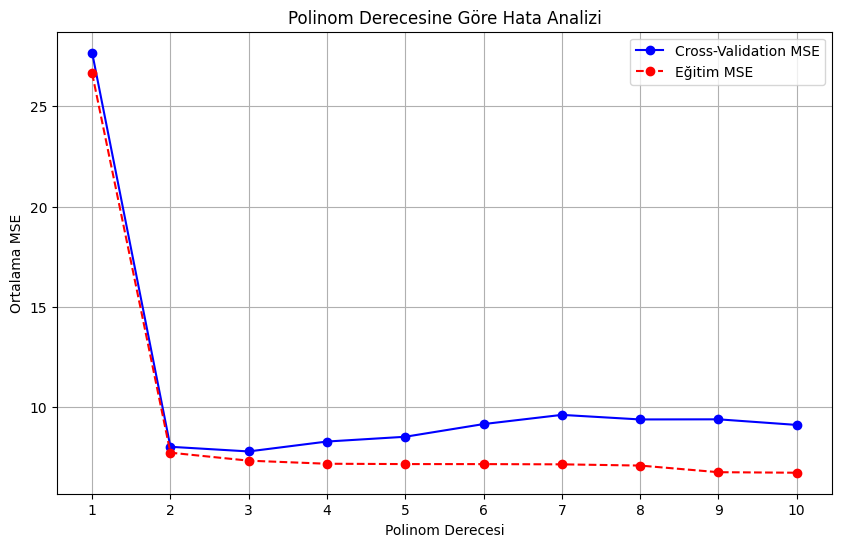

En İyi Polinom Derecesi: 3
Test Seti MSE: 5.42


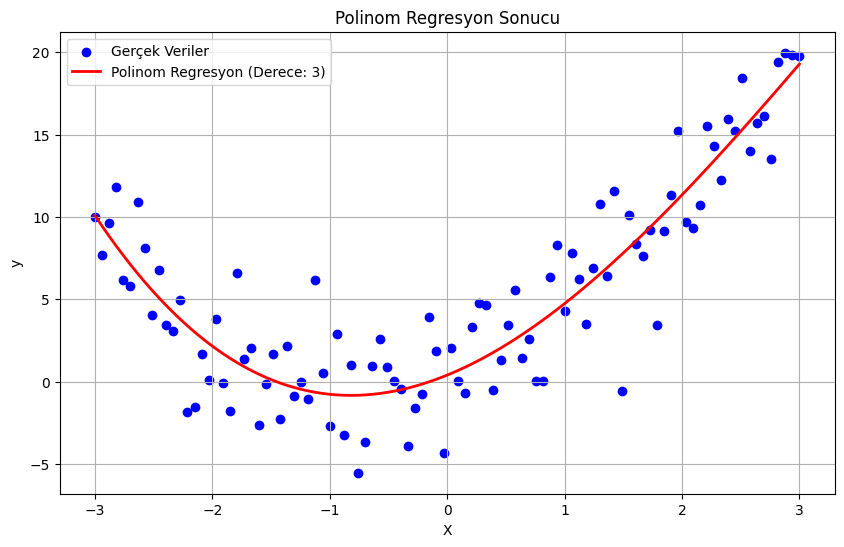

In [1]:
# 1. Gerekli Kütüphaneleri Yükleyelim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# 2. Örnek Veri Oluşturma (y = 1.5x² + 2x + 1 + gürültü)
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)  # Bağımsız değişken
y = 1.5 * X.flatten()**2 + 2 * X.flatten() + 1 + np.random.normal(0, 3, 100)  # Bağımlı değişken

# 3. Veriyi Eğitim ve Test Setlerine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Cross-Validation ile En İyi Polinom Derecesini Belirleme
degrees = range(1, 11)  # 1'den 10'a kadar deniyoruz
cv_scores = []          # Cross-validation hataları
train_scores = []       # Eğitim hataları

for degree in degrees:
    # Pipeline: Polinom Özellikler + Lineer Regresyon
    model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression()
    )
    
    # 5-Fold Cross-Validation ile Ortalama MSE Hesaplama
    cv_mse = -np.mean(cross_val_score(model, X_train, y_train, 
                                      scoring='neg_mean_squared_error', cv=5))
    cv_scores.append(cv_mse)
    
    # Eğitim Verisi Üzerinde Modeli Eğit ve Eğitim Hatasını Hesapla
    model.fit(X_train, y_train)
    train_mse = mean_squared_error(y_train, model.predict(X_train))
    train_scores.append(train_mse)

# 5. Sonuçları Görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(degrees, cv_scores, 'bo-', label='Cross-Validation MSE')
plt.plot(degrees, train_scores, 'ro--', label='Eğitim MSE')
plt.xlabel('Polinom Derecesi')
plt.ylabel('Ortalama MSE')
plt.title('Polinom Derecesine Göre Hata Analizi')
plt.legend()
plt.grid(True)
plt.xticks(degrees)
plt.show()

# 6. En İyi Dereceyi Belirleme
best_degree = degrees[np.argmin(cv_scores)]
print(f"En İyi Polinom Derecesi: {best_degree}")

# 7. Final Modelini Eğitme ve Test Verisiyle Değerlendirme
final_model = make_pipeline(
    PolynomialFeatures(degree=best_degree, include_bias=False),
    LinearRegression()
)
final_model.fit(X_train, y_train)

# Test Seti Üzerindeki Performans
y_test_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test Seti MSE: {test_mse:.2f}")

# 8. Modelin Tahminlerini Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gerçek Veriler')
plt.plot(np.sort(X.flatten()), final_model.predict(np.sort(X).reshape(-1, 1)), 
         color='red', linewidth=2, label='Polinom Regresyon (Derece: {})'.format(best_degree))
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polinom Regresyon Sonucu')
plt.legend()
plt.grid(True)
plt.show()
